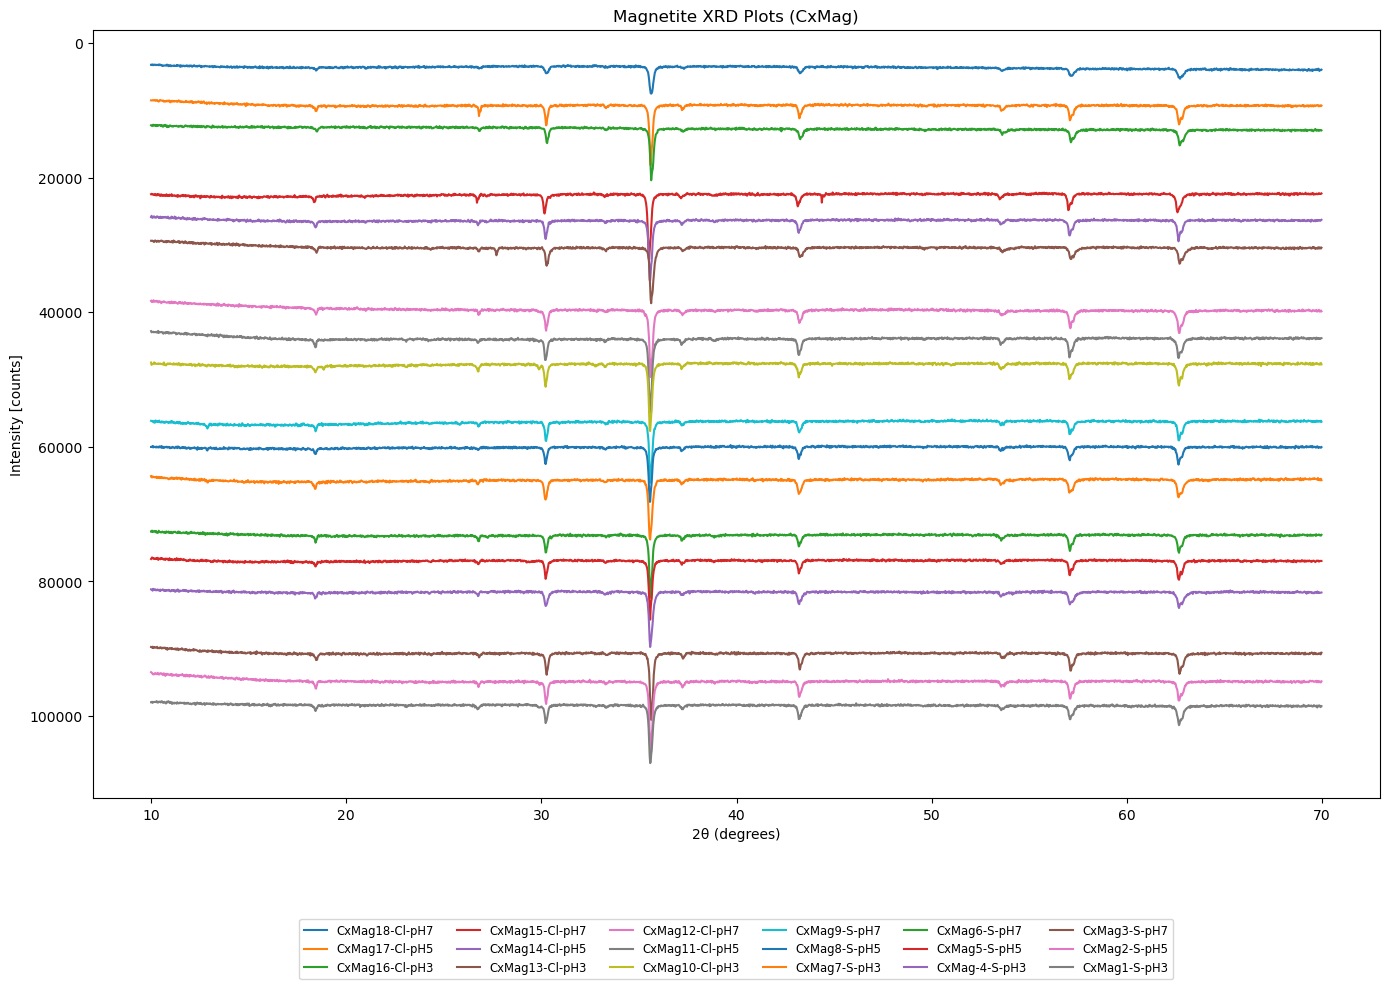

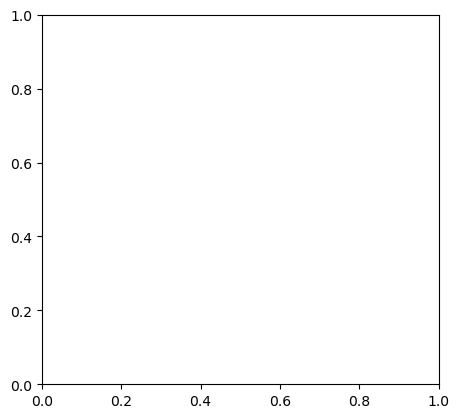

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import re

data_dir = Path('.')  # current folder with your txt files
files = list(data_dir.glob('*.txt'))

# Function to extract number from filename (assumes filename contains number)
def extract_number(file_path):
    match = re.search(r'\d+', file_path.stem)
    return int(match.group()) if match else -1

files.sort(key=extract_number)

custom_labels = [os.path.splitext(f.name)[0] for f in files]  # removes .txt extension

# Sort files based on extracted number
files.sort(key=extract_number)

plt.figure(figsize=(14, 10))
# Now plot files in correct numeric order
offset = 0
offset_step = 4000  # offset between samples within a group
group_spacing = 5000  # extra offset between groups of 3 samples

for i, f in enumerate(reversed(files), 1):
    data = np.loadtxt(f)
    angle = data[:, 0]
    intensity = data[:, 1]
    
    label_name = os.path.splitext(f.name)[0]  # filename without .txt
    
    plt.plot(angle, intensity + offset, label=label_name)
    
    offset += offset_step
    
  # Add extra spacing after every 3 samples to separate groups
    if i % 3 == 0:
        offset += group_spacing

plt.xlabel('2θ (degrees)')
plt.ylabel('Intensity [counts]')
plt.title('Magnetite XRD Plots (CxMag)')
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=6,
    fontsize='small'
)

ax = plt.gca()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])

plt.tight_layout()
plt.gca().invert_yaxis()  # <- this line makes sample 1 the top trace, sample 18 the bottom
plt.savefig('stacked_xrd_plot_topdown.png', dpi=300)
plt.show()
plt.tight_layout()
ax = plt.gca()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])

plt.savefig('stacked_xrd_plot.png', dpi=300)
plt.show()

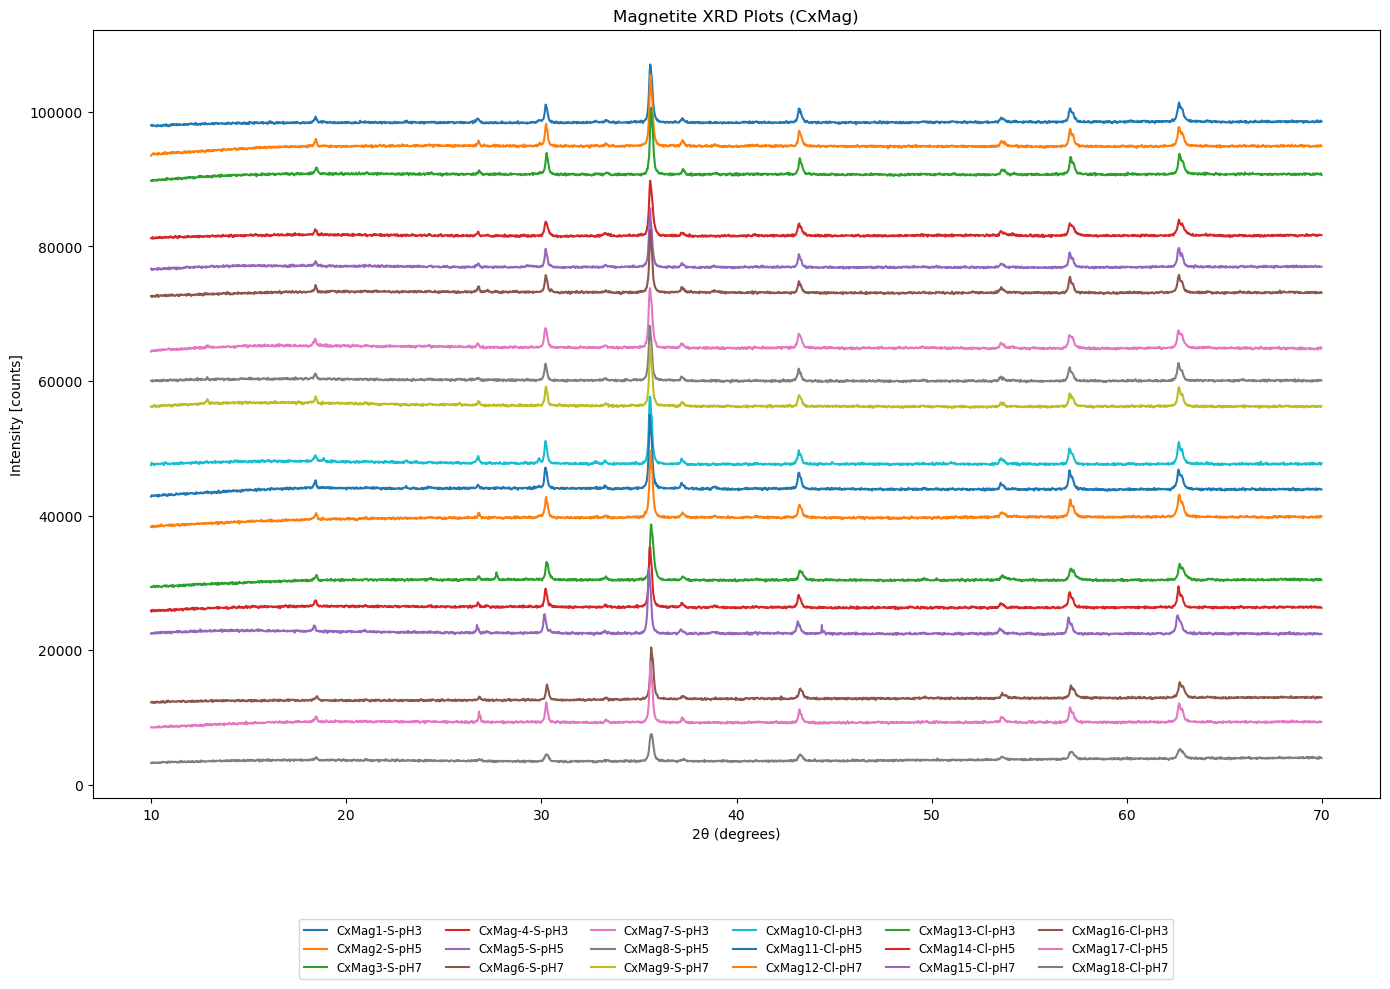

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import re

data_dir = Path('.')  # current folder
files = list(data_dir.glob('*.txt'))

def extract_number(file_path):
    match = re.search(r'\d+', file_path.stem)
    return int(match.group()) if match else -1

files.sort(key=extract_number)

plt.figure(figsize=(14, 10))

offset_step = 4000
group_spacing = 5000

total_plots = len(files)

# Start offset high (top curve)
offset = (total_plots - 1) * offset_step + ((total_plots - 1) // 3) * group_spacing

for i, f in enumerate(files, 1):
    data = np.loadtxt(f)
    angle = data[:, 0]
    intensity = data[:, 1]

    label_name = os.path.splitext(f.name)[0]

    plt.plot(angle, intensity + offset, label=label_name)

    offset -= offset_step

    if i % 3 == 0:
        offset -= group_spacing

plt.xlabel('2θ (degrees)')
plt.ylabel('Intensity [counts]')
plt.title('Magnetite XRD Plots (CxMag)')

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=6,
    fontsize='small'
)

ax = plt.gca()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.8, pos.height])

plt.tight_layout()
plt.savefig('stacked_xrd_plot.png', dpi=300)
plt.show()